In [1]:
from Coding.Encoders import PoissonCoding
from pymonntorch import Network, NeuronGroup, Recorder, EventRecorder, SynapseGroup
from Util.Synapse import DDFSynapse
from Util.Current import ConstantCurrent
from Util.TimeResolution import TimeResolution
from Models.LIF import LIF
from matplotlib import pyplot as plt
import torch
from matplotlib import pyplot as plt
import numpy as np
from Util.Learning import SimpleSTDP
from Util.Axon import NeuronAxon
from Util.Trace import SpikeTrace
from Util.Input import InputBehavior
np.random.seed(32)
torch.manual_seed(32)

/Users/mohazamani/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Constant Current With Noise


In [2]:
def spike_times_plot(ng: NeuronGroup):
    plt.rcParams.update({'font.size': 6})
    plt.figure(figsize=(4.5, 3.5))
    plt.scatter(ng['spike'][0][ng['spike', 0][:, 1] == 1] * 0.01,
                ng['spike'][0][ng['spike', 0][:, 1] == 1])
    plt.xlabel('time', fontsize=12)
    plt.ylabel('iteration Nnumber', fontsize=12)
    plt.title('spike times', fontsize=12)
    plt.show()


def input_and_dynamic_plot(ng: NeuronGroup, iter_num: int = 100):
    # plot 1:
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    plt.plot(ng['v', 0][:iter_num, :])
    plt.hlines(y=-70, xmin=-10, xmax=iter_num+5,
               linestyles='--', color='g', label='resting potential')
    plt.hlines(y=-40, xmin=-10, xmax=iter_num+5,
               linestyles='--', color='r', label='threshold')
    plt.xlabel('iteration')
    plt.ylabel('Voltage')
    plt.legend()

    # plot 2:
    plt.subplot(1, 2, 2)
    plt.plot(ng['I', 0][:iter_num, :])
    plt.xlabel('iteration')
    plt.ylabel('input current')

    plt.show()


def plot_weights_changes_in_stdp(sg: SynapseGroup):
    x = np.arange(0, 700)

    plt.rcParams.update({'font.size': 8})
    fig, ax = plt.subplots(figsize=(5.5, 3.3))

    ax.plot(x, sg['W'][0][:, 0][:, 0], lw=1, label='W11')
    ax.plot(x, sg['W'][0][:, 0][:, 1], lw=1, label='W12')
    ax.plot(x, sg['W'][0][:, 1][:, 0], lw=1, label='W21')
    ax.plot(x, sg['W'][0][:, 1][:, 1], lw=1, label='W22')
    ax.plot(x, sg['W'][0][:, 2][:, 0], lw=1, label='W31')
    ax.plot(x, sg['W'][0][:, 2][:, 1], lw=1, label='W32')
    ax.plot(x, sg['W'][0][:, 3][:, 0], lw=1, label='W41')
    ax.plot(x, sg['W'][0][:, 3][:, 1], lw=1, label='W42')

    plt.legend()
    plt.show()


def plot_weights_changes_in_stdp_three_output(sg: SynapseGroup):
    x = np.arange(0, 700)

    plt.rcParams.update({'font.size': 8})
    fig, ax = plt.subplots(figsize=(5.5, 3.3))

    ax.plot(x, sg['W'][0][:, 0][:, 0], lw=1, label='W11')
    ax.plot(x, sg['W'][0][:, 0][:, 1], lw=1, label='W12')
    ax.plot(x, sg['W'][0][:, 0][:, 2], lw=1, label='W13')
    ax.plot(x, sg['W'][0][:, 1][:, 0], lw=1, label='W21')
    ax.plot(x, sg['W'][0][:, 1][:, 1], lw=1, label='W22')
    ax.plot(x, sg['W'][0][:, 1][:, 2], lw=1, label='W23')
    ax.plot(x, sg['W'][0][:, 2][:, 0], lw=1, label='W31')
    ax.plot(x, sg['W'][0][:, 2][:, 1], lw=1, label='W32')
    ax.plot(x, sg['W'][0][:, 2][:, 2], lw=1, label='W33')
    ax.plot(x, sg['W'][0][:, 3][:, 0], lw=1, label='W41')
    ax.plot(x, sg['W'][0][:, 3][:, 1], lw=1, label='W42')
    ax.plot(x, sg['W'][0][:, 3][:, 2], lw=1, label='W43')

    plt.legend()
    plt.show()


def plot_weights_changes_in_stdp_three_output(sg: SynapseGroup):
    x = np.arange(0, 700)

    plt.rcParams.update({'font.size': 8})
    fig, ax = plt.subplots(figsize=(5.5, 3.3))

    ax.plot(x, sg['W'][0][:, 0][:, 0], lw=1, label='W11')
    ax.plot(x, sg['W'][0][:, 0][:, 1], lw=1, label='W12')
    ax.plot(x, sg['W'][0][:, 0][:, 2], lw=1, label='W13')
    ax.plot(x, sg['W'][0][:, 1][:, 0], lw=1, label='W21')
    ax.plot(x, sg['W'][0][:, 1][:, 1], lw=1, label='W22')
    ax.plot(x, sg['W'][0][:, 1][:, 2], lw=1, label='W23')
    ax.plot(x, sg['W'][0][:, 2][:, 0], lw=1, label='W31')
    ax.plot(x, sg['W'][0][:, 2][:, 1], lw=1, label='W32')
    ax.plot(x, sg['W'][0][:, 2][:, 2], lw=1, label='W33')
    ax.plot(x, sg['W'][0][:, 3][:, 0], lw=1, label='W41')
    ax.plot(x, sg['W'][0][:, 3][:, 1], lw=1, label='W42')
    ax.plot(x, sg['W'][0][:, 3][:, 2], lw=1, label='W43')

    plt.legend()
    plt.show()


def spike_times_for_multiple_ng(ngs: list[NeuronGroup]):
    plt.rcParams.update({'font.size': 6})
    fig, ax = plt.subplots(figsize=(4, 3))

    for ind, ng in enumerate(ngs):
        ax.scatter(ng['spike'][0][ng['spike', 0][:, 1] == 1] * 0.01,
                   ng['spike'][0][ng['spike', 0][:, 1] == 1], s=2, label='ng%d' % (ind+1)),

    plt.xlabel('time', fontsize=12)
    plt.ylabel('iteration Nnumber', fontsize=12)
    plt.title('spike times', fontsize=12)
    plt.legend()
    plt.show()

In [3]:
net = Network(behavior={1: TimeResolution(dt=0.01)},
              dtype=torch.float64, tag='NET')

current1 = ConstantCurrent(value=200, with_noise=True, noise_level=20)
current2 = ConstantCurrent(value=0)
current3 = ConstantCurrent(value=50, with_noise=True, noise_level=20)

neuron_model = LIF(
    tau=10,
    u_rest=-65,
    u_reset=-70,
    threshold=-40,
    R=10,
    v_init_mode="normal(-40, 10)",
)

ng1 = NeuronGroup(
    size=4,
    net=net,
    behavior={
        2: current1,
        4: neuron_model,
        5: SpikeTrace(tau_s=10),
        6: NeuronAxon(have_trace=True),
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG1",
)

ng2 = NeuronGroup(
    size=4,
    net=net,
    behavior={
        2: current3,
        4: neuron_model,
        5: SpikeTrace(tau_s=10),
        6: NeuronAxon(),
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG2",
)

ng3 = NeuronGroup(
    size=2,
    net=net,
    behavior={
        2: current2,
        4: neuron_model,
        5: SpikeTrace(tau_s=10),
        6: NeuronAxon(),
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG3",
)

s1 = SynapseGroup(net=net, src=ng1, dst=ng3, behavior={
    3: DDFSynapse(connection_mode='full', mean=50, std=5),
    6: SimpleSTDP(a_plus=2, a_minus=2, positive_bound='hard_bound', negative_bound='hard_bound', w_max=100, w_min=-1000),
    4: Recorder("W", tag="weights")
}, tag='excitatory')

s2 = SynapseGroup(net=net, src=ng2, dst=ng3, behavior={
    3: DDFSynapse(connection_mode='full', mean=50, std=5),
    6: SimpleSTDP(a_plus=2, a_minus=2, positive_bound='hard_bound', negative_bound='hard_bound', w_max=100, w_min=-1000),
    4: Recorder("W", tag="weights")
}, tag='excitatory')

net.initialize()
net.simulate_iterations(700)

Network['NET', 'Network'](Neurons: tensor(10)|3 groups, Synapses: tensor(16)|2 groups){1:TimeResolution(dt=0.01,)}
NeuronGroup['NG1', 'NeuronGroup', 'ng'](4){2:ConstantCurrent(value=200,with_noise=True,noise_level=20,)4:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-40,R=10,v_init_mode=normal(-40, 10),)5:SpikeTrace(tau_s=10,)6:NeuronAxon(max_delay=1,proximal_min_delay=0,distal_min_delay=0,apical_min_delay=0,have_trace=True,)8:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_rec, ng_recorder,)9:Recorder(variables=['iter', 'spike_counts'],gap_width=0,max_length=None,auto_annotate=True,tag=iter_rec, spike_n_rec,)10:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=ng_evrec,arg_0=spike,)}
NeuronGroup['NG2', 'NeuronGroup', 'ng'](4){2:ConstantCurrent(value=50,with_noise=True,noise_level=20,)4:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-40,R=10,v_init_mode=normal(-40, 10),)5:SpikeTrace(tau_s=10,)6:NeuronAxon(max_delay=1,proximal_

474.5769500732422

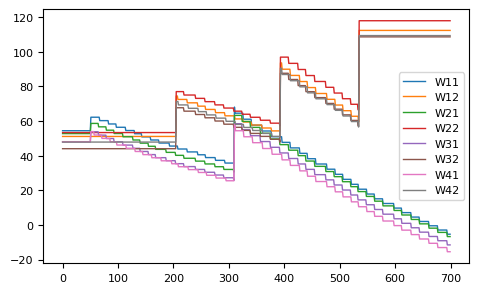

In [4]:
plot_weights_changes_in_stdp(s1)

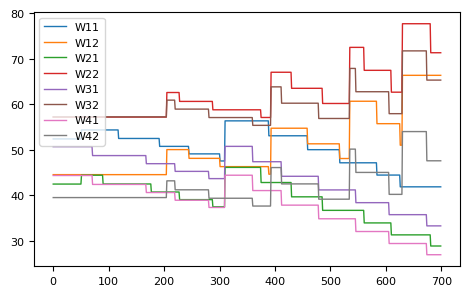

In [5]:
plot_weights_changes_in_stdp(s2)

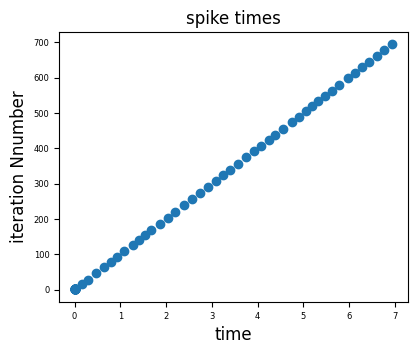

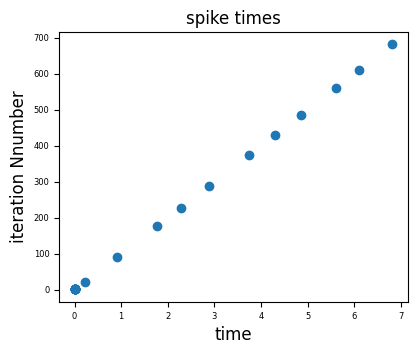

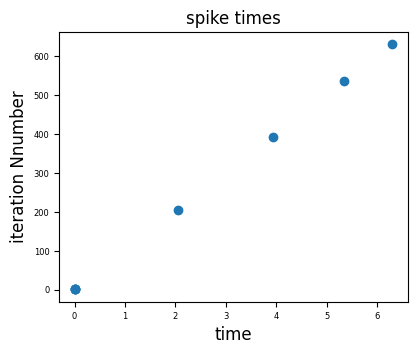

In [6]:
spike_times_plot(ng1)
spike_times_plot(ng2)
spike_times_plot(ng3)

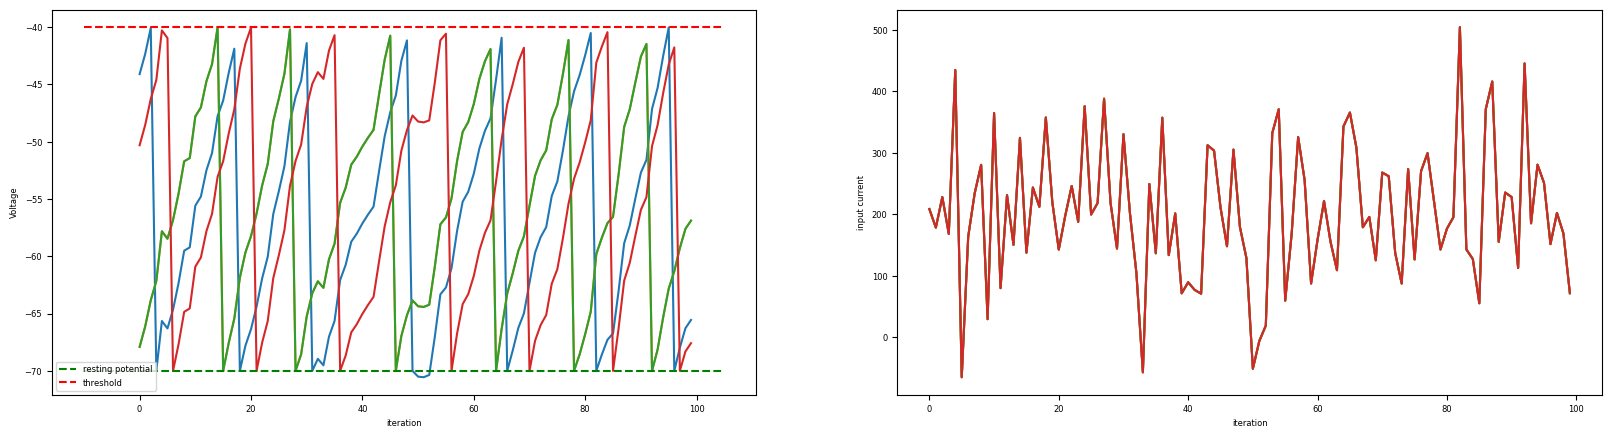

In [7]:
input_and_dynamic_plot(ng1)

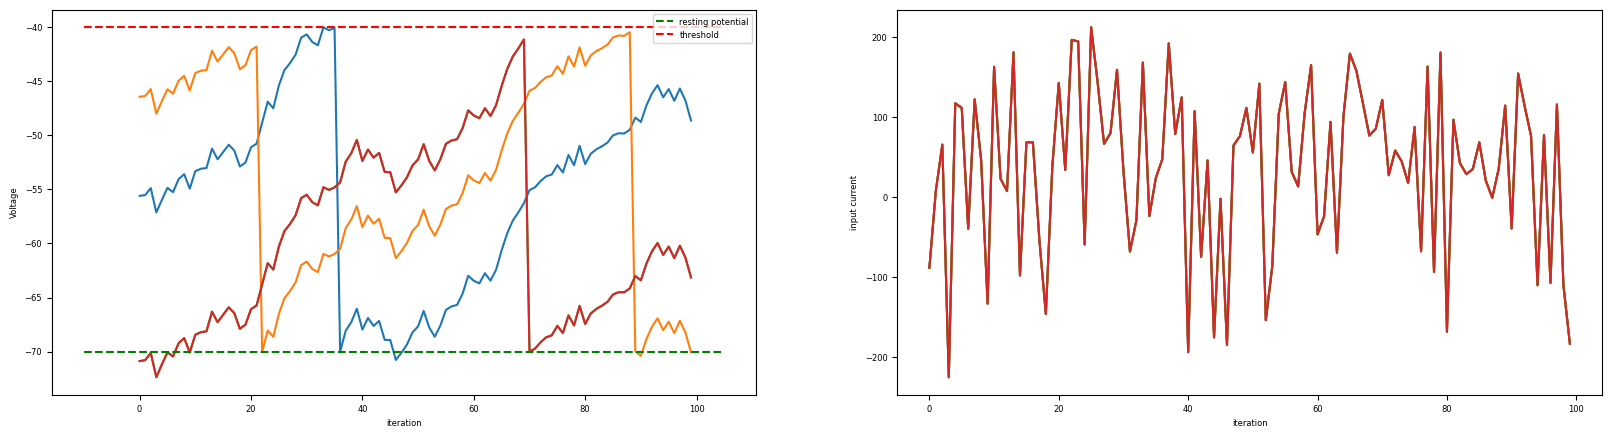

In [8]:
input_and_dynamic_plot(ng2)

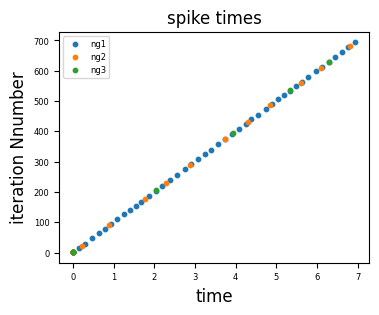

In [21]:
spike_times_for_multiple_ng([ng1, ng2, ng3])

In [10]:
def cosine_similarity_plot(s1: SynapseGroup, s2: SynapseGroup) -> None:
    cosine_sims = []
    for i in range(700):
        x1 = torch.Tensor([[s1['W'][0][:, 0][i, 0], s1['W'][0][:, 1][i, 0], s1['W'][0][:, 2][i, 0], s1['W'][0][:, 3]
                          [i, 0], s2['W'][0][:, 0][i, 0], s2['W'][0][:, 1][i, 0], s2['W'][0][:, 2][i, 0], s2['W'][0][:, 3][i, 0]]])
        x2 = torch.Tensor([[s1['W'][0][:, 0][i, 1], s1['W'][0][:, 1][i, 1], s1['W'][0][:, 2][i, 1], s1['W'][0][:, 3]
                          [i, 1], s2['W'][0][:, 0][i, 1], s2['W'][0][:, 1][i, 1], s2['W'][0][:, 2][i, 1], s2['W'][0][:, 3][i, 1]]])
        cosine_sims.append(
            torch.nn.functional.cosine_similarity(x1, x2, dim=1))

    plt.rcParams.update({'font.size': 6})
    plt.figure(figsize=(4, 3))
    plt.plot(np.arange(700), cosine_sims)
    plt.xlabel('Iteration Nnumber', fontsize=8)
    plt.ylabel('Cosine Sim', fontsize=8)
    plt.title('Cosine Similarity Of Weights', fontsize=8)
    plt.show()

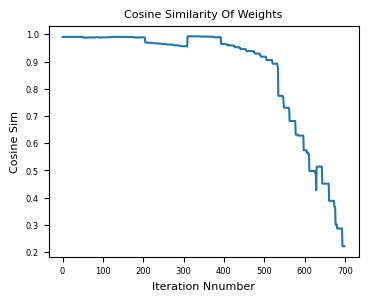

In [93]:
cosine_similarity_plot(s1, s2)

[]

In [111]:
net2 = Network(behavior={1: TimeResolution(dt=0.01)},
               dtype=torch.float64, tag='NET2')

neuron_model2 = LIF(
    tau=10,
    u_rest=-65,
    u_reset=-70,
    threshold=1000000,
    R=10,
    v_init_mode="normal(-40, 10)",
)

ng4 = NeuronGroup(
    size=4,
    net=net2,
    behavior={
        2: current1,
        4: neuron_model,
        5: SpikeTrace(tau_s=10),
        6: NeuronAxon(have_trace=True),
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG4",
)

ng5 = NeuronGroup(
    size=4,
    net=net2,
    behavior={
        2: current3,
        4: neuron_model,
        5: SpikeTrace(tau_s=10),
        6: NeuronAxon(),
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG5",
)

ng6 = NeuronGroup(
    size=1,
    net=net2,
    behavior={
        2: current2,
        4: neuron_model,
        5: SpikeTrace(tau_s=10),
        6: NeuronAxon(),
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG6",
)

ng7 = NeuronGroup(
    size=1,
    net=net2,
    behavior={
        2: current2,
        4: neuron_model2,
        5: SpikeTrace(tau_s=10),
        6: NeuronAxon(),
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG7",
)

ng8 = NeuronGroup(
    size=2,
    net=net2,
    behavior={
        2: current2,
        4: neuron_model,
        5: SpikeTrace(tau_s=10),
        6: NeuronAxon(),
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG8",
)

s3 = SynapseGroup(net=net2, src=ng4, dst=ng7, behavior={
    3: DDFSynapse(connection_mode='full', mean=50, std=5),
    6: SimpleSTDP(a_plus=2, a_minus=2, positive_bound='hard_bound', negative_bound='hard_bound', w_max=100, w_min=-1000),
    4: Recorder("W", tag="weights3")
}, tag='excitatory')

s4 = SynapseGroup(net=net2, src=ng5, dst=ng7, behavior={
    3: DDFSynapse(connection_mode='full', mean=50, std=5),
    6: SimpleSTDP(a_plus=2, a_minus=2, positive_bound='hard_bound', negative_bound='hard_bound', w_max=100, w_min=-1000),
    4: Recorder("W", tag="weights4")
}, tag='excitatory')


s5 = SynapseGroup(net=net2, src=ng6, dst=ng7, behavior={
    3: DDFSynapse(connection_mode='full', mean=50, std=5),
    6: SimpleSTDP(a_plus=2, a_minus=2, positive_bound='hard_bound', negative_bound='hard_bound', w_max=100, w_min=-1000),
    4: Recorder("W", tag="weights5")
}, tag='excitatory')


s6 = SynapseGroup(net=net2, src=ng4, dst=ng8, behavior={
    3: DDFSynapse(connection_mode='full', mean=50, std=5),
    6: SimpleSTDP(a_plus=2, a_minus=2, positive_bound='hard_bound', negative_bound='hard_bound', w_max=100, w_min=-1000),
    4: Recorder("W", tag="weights3")
}, tag='excitatory')

s7 = SynapseGroup(net=net2, src=ng5, dst=ng8, behavior={
    3: DDFSynapse(connection_mode='full', mean=50, std=5),
    6: SimpleSTDP(a_plus=2, a_minus=2, positive_bound='hard_bound', negative_bound='hard_bound', w_max=100, w_min=-1000),
    4: Recorder("W", tag="weights4")
}, tag='excitatory')

s8 = SynapseGroup(net=net2, src=ng6, dst=ng8, behavior={
    3: DDFSynapse(connection_mode='full', mean=50, std=5),
    6: SimpleSTDP(a_plus=2, a_minus=2, positive_bound='hard_bound', negative_bound='hard_bound', w_max=100, w_min=-1000),
    4: Recorder("W", tag="weights5")
}, tag='excitatory')

net2.initialize()
net2.simulate_iterations(700)

Network['NET2', 'Network'](Neurons: tensor(12)|5 groups, Synapses: tensor(27)|6 groups){1:TimeResolution(dt=0.01,)}
NeuronGroup['NG4', 'NeuronGroup', 'ng'](4){2:ConstantCurrent(value=200,with_noise=True,noise_level=20,)4:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-40,R=10,v_init_mode=normal(-40, 10),)5:SpikeTrace(tau_s=10,)6:NeuronAxon(max_delay=1,proximal_min_delay=0,distal_min_delay=0,apical_min_delay=0,have_trace=True,)8:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_rec, ng_recorder,)9:Recorder(variables=['iter', 'spike_counts'],gap_width=0,max_length=None,auto_annotate=True,tag=iter_rec, spike_n_rec,)10:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=ng_evrec,arg_0=spike,)}
NeuronGroup['NG5', 'NeuronGroup', 'ng'](4){2:ConstantCurrent(value=50,with_noise=True,noise_level=20,)4:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-40,R=10,v_init_mode=normal(-40, 10),)5:SpikeTrace(tau_s=10,)6:NeuronAxon(max_delay=1,proximal

923.92897605896

In [15]:
def last_weight_changes_plot(sg: SynapseGroup) -> None:
    x = np.arange(0, 700)

    plt.rcParams.update({'font.size': 8})
    fig, ax = plt.subplots(figsize=(5.5, 3.3))

    ax.plot(x, sg[0]['W'][0][:, 0][:, 0], lw=1, label='W1')
    ax.plot(x, sg[0]['W'][0][:, 1][:, 0], lw=1, label='W2')
    ax.plot(x, sg[0]['W'][0][:, 2][:, 0], lw=1, label='W3')
    ax.plot(x, sg[0]['W'][0][:, 3][:, 0], lw=1, label='W4')
    ax.plot(x, sg[1]['W'][0][:, 0][:, 0], lw=1, label='W5')
    ax.plot(x, sg[1]['W'][0][:, 1][:, 0], lw=1, label='W6')
    ax.plot(x, sg[1]['W'][0][:, 2][:, 0], lw=1, label='W7')
    ax.plot(x, sg[1]['W'][0][:, 3][:, 0], lw=1, label='W8')
    ax.plot(x, sg[2]['W'][0][:, 0][:, 0], lw=1, label='W9')

    plt.legend()
    plt.show()

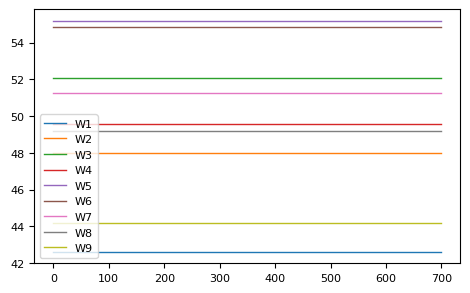

In [17]:
last_weight_changes_plot([s3, s4, s5])

### Piosson Input


In [3]:
net = Network(behavior={1: TimeResolution(dt=0.01)},
              dtype=torch.float64, tag='NET')

neuron_model = LIF(
    tau=10,
    u_rest=-65,
    u_reset=-70,
    threshold=-40,
    R=10,
    v_init_mode="normal(-40, 10)",
)

current2 = ConstantCurrent(value=0)

ng1 = NeuronGroup(
    size=4,
    net=net,
    behavior={
        2: InputBehavior(spikes=PoissonCoding(time_window=700, ratio=0.3)(torch.Tensor(plt.imread('./data/bird.tif').flatten()) / 256)),
        5: SpikeTrace(tau_s=10),
        6: NeuronAxon(have_trace=True),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG1",
)

ng2 = NeuronGroup(
    size=4,
    net=net,
    behavior={
        2: InputBehavior(spikes=PoissonCoding(time_window=700, ratio=0.3)(torch.Tensor(plt.imread('./data/bridge.tif').flatten()) / 256)),
        5: SpikeTrace(tau_s=10),
        6: NeuronAxon(),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG2",
)

ng3 = NeuronGroup(
    size=2,
    net=net,
    behavior={
        2: current2,
        4: neuron_model,
        5: SpikeTrace(tau_s=10),
        6: NeuronAxon(),
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG3",
)

s1 = SynapseGroup(net=net, src=ng1, dst=ng3, behavior={
    3: DDFSynapse(connection_mode='full', mean=50, std=5),
    6: SimpleSTDP(a_plus=2, a_minus=2, positive_bound='hard_bound', negative_bound='hard_bound', w_max=100, w_min=-1000),
    4: Recorder("W", tag="weights")
}, tag='excitatory')

s2 = SynapseGroup(net=net, src=ng2, dst=ng3, behavior={
    3: DDFSynapse(connection_mode='full', mean=50, std=5),
    6: SimpleSTDP(a_plus=2, a_minus=2, positive_bound='hard_bound', negative_bound='hard_bound', w_max=100, w_min=-1000),
    4: Recorder("W", tag="weights")
}, tag='excitatory')

net.initialize()
net.simulate_iterations(700)

Network['NET', 'Network'](Neurons: tensor(10)|3 groups, Synapses: tensor(16)|2 groups){1:TimeResolution(dt=0.01,)}
NeuronGroup['NG1', 'NeuronGroup', 'ng'](4){2:InputBehavior(spikes=tensor([[1, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 1],
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0]], dtype=torch.int32),)5:SpikeTrace(tau_s=10,)6:NeuronAxon(max_delay=1,proximal_min_delay=0,distal_min_delay=0,apical_min_delay=0,have_trace=True,)10:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=ng_evrec,arg_0=spike,)}
NeuronGroup['NG2', 'NeuronGroup', 'ng'](4){2:InputBehavior(spikes=tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 1, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.int32),)5:SpikeTrace(tau_s=10,)6:NeuronAxon(max_delay=

420.612096786499

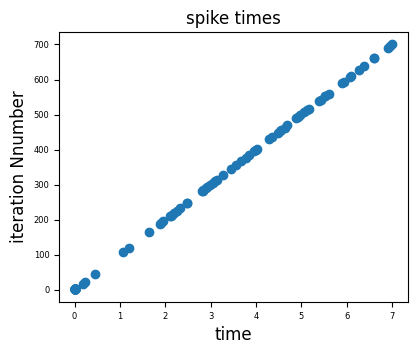

In [4]:
spike_times_plot(ng1)

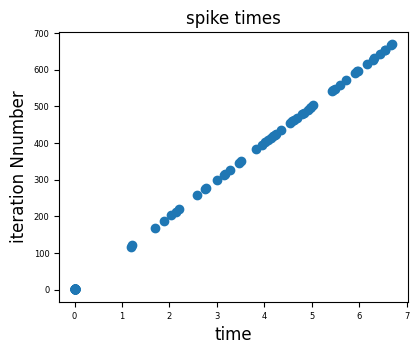

In [5]:
spike_times_plot(ng2)

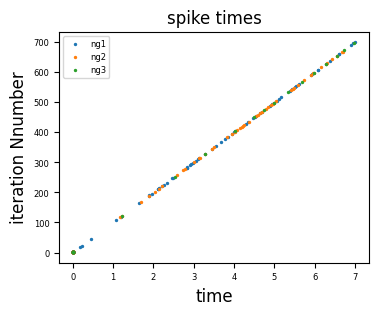

In [6]:
spike_times_for_multiple_ng([ng1, ng2, ng3])

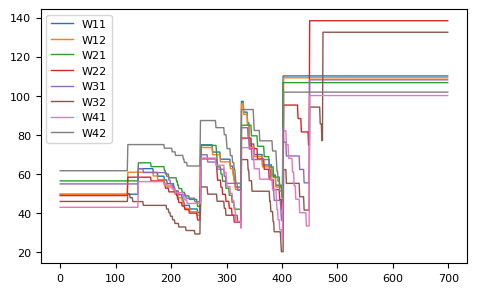

In [7]:
plot_weights_changes_in_stdp(s1)

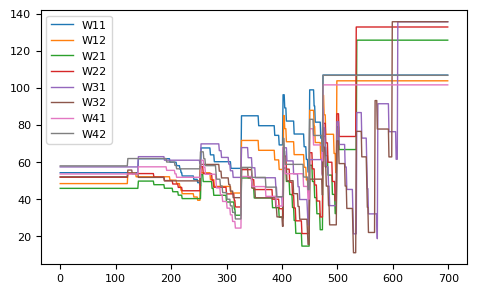

In [8]:
plot_weights_changes_in_stdp(s2)

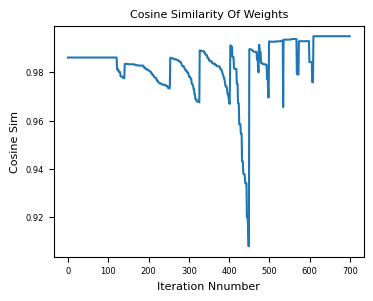

In [11]:
cosine_similarity_plot(s1, s2)

In [13]:
net2 = Network(behavior={1: TimeResolution(dt=0.01)},
               dtype=torch.float64, tag='NET2')

neuron_model2 = LIF(
    tau=10,
    u_rest=-65,
    u_reset=-70,
    threshold=1000000,
    R=10,
    v_init_mode="normal(-40, 10)",
)

ng4 = NeuronGroup(
    size=4,
    net=net2,
    behavior={
        2: InputBehavior(spikes=PoissonCoding(time_window=700, ratio=0.3)(torch.Tensor(plt.imread('./data/bird.tif').flatten()) / 256)),
        # 4: neuron_model,
        5: SpikeTrace(tau_s=10),
        6: NeuronAxon(have_trace=True),
        # 8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        # 9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG4",
)

ng5 = NeuronGroup(
    size=4,
    net=net2,
    behavior={
        2: InputBehavior(spikes=PoissonCoding(time_window=700, ratio=0.3)(torch.Tensor(plt.imread('./data/bridge.tif').flatten()) / 256)),
        # 4: neuron_model,
        5: SpikeTrace(tau_s=10),
        6: NeuronAxon(),
        # 8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        # 9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG5",
)

ng6 = NeuronGroup(
    size=1,
    net=net2,
    behavior={
        2: current2,
        4: neuron_model,
        5: SpikeTrace(tau_s=10),
        6: NeuronAxon(),
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG6",
)

ng7 = NeuronGroup(
    size=1,
    net=net2,
    behavior={
        2: current2,
        4: neuron_model2,
        5: SpikeTrace(tau_s=10),
        6: NeuronAxon(),
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG7",
)

ng8 = NeuronGroup(
    size=2,
    net=net2,
    behavior={
        2: current2,
        4: neuron_model,
        5: SpikeTrace(tau_s=10),
        6: NeuronAxon(),
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG8",
)

s3 = SynapseGroup(net=net2, src=ng4, dst=ng7, behavior={
    3: DDFSynapse(connection_mode='full', mean=50, std=5),
    6: SimpleSTDP(a_plus=2, a_minus=2, positive_bound='hard_bound', negative_bound='hard_bound', w_max=100, w_min=-1000),
    4: Recorder("W", tag="weights3")
}, tag='excitatory')

s4 = SynapseGroup(net=net2, src=ng5, dst=ng7, behavior={
    3: DDFSynapse(connection_mode='full', mean=50, std=5),
    6: SimpleSTDP(a_plus=2, a_minus=2, positive_bound='hard_bound', negative_bound='hard_bound', w_max=100, w_min=-1000),
    4: Recorder("W", tag="weights4")
}, tag='excitatory')


s5 = SynapseGroup(net=net2, src=ng6, dst=ng7, behavior={
    3: DDFSynapse(connection_mode='full', mean=50, std=5),
    6: SimpleSTDP(a_plus=2, a_minus=2, positive_bound='hard_bound', negative_bound='hard_bound', w_max=100, w_min=-1000),
    4: Recorder("W", tag="weights5")
}, tag='excitatory')


s6 = SynapseGroup(net=net2, src=ng4, dst=ng8, behavior={
    3: DDFSynapse(connection_mode='full', mean=50, std=5),
    6: SimpleSTDP(a_plus=2, a_minus=2, positive_bound='hard_bound', negative_bound='hard_bound', w_max=100, w_min=-1000),
    4: Recorder("W", tag="weights3")
}, tag='excitatory')

s7 = SynapseGroup(net=net2, src=ng5, dst=ng8, behavior={
    3: DDFSynapse(connection_mode='full', mean=50, std=5),
    6: SimpleSTDP(a_plus=2, a_minus=2, positive_bound='hard_bound', negative_bound='hard_bound', w_max=100, w_min=-1000),
    4: Recorder("W", tag="weights4")
}, tag='excitatory')

s8 = SynapseGroup(net=net2, src=ng6, dst=ng8, behavior={
    3: DDFSynapse(connection_mode='full', mean=50, std=5),
    6: SimpleSTDP(a_plus=2, a_minus=2, positive_bound='hard_bound', negative_bound='hard_bound', w_max=100, w_min=-1000),
    4: Recorder("W", tag="weights5")
}, tag='excitatory')

net2.initialize()
net2.simulate_iterations(700)

Network['NET2', 'Network'](Neurons: tensor(12)|5 groups, Synapses: tensor(27)|6 groups){1:TimeResolution(dt=0.01,)}
NeuronGroup['NG4', 'NeuronGroup', 'ng'](4){2:InputBehavior(spikes=tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 1, 0,  ..., 1, 0, 0],
        [0, 0, 0,  ..., 0, 1, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.int32),)5:SpikeTrace(tau_s=10,)6:NeuronAxon(max_delay=1,proximal_min_delay=0,distal_min_delay=0,apical_min_delay=0,have_trace=True,)10:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=ng_evrec,arg_0=spike,)}
NeuronGroup['NG5', 'NeuronGroup', 'ng'](4){2:InputBehavior(spikes=tensor([[0, 0, 0,  ..., 0, 0, 1],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [0, 1, 1,  ..., 0, 0, 0]], dtype=torch.int32),)5:SpikeTrace(tau_s=10,)6:NeuronAxon(max_delay

792.1309471130371

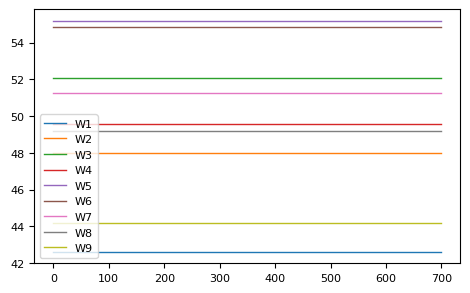

In [16]:
last_weight_changes_plot([s3, s4, s5])